<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png" width="500" height="auto" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Prof. Dr. Thomas Nagel</strong></p>
        <p>Chair of Soil Mechanics and Foundation Engineering<br>Geotechnical Institute<br>Technische Universität Bergakademie Freiberg.</p>
        <p><a href="https://tu-freiberg.de/en/soilmechanics">https://tu-freiberg.de/en/soilmechanics</a></p>
    </div>
</div>

In [10]:
#HIDDEN
import numpy as np #numerical methods
#import sympy as sp #symbolic operations
import matplotlib.pyplot as plt #plotting
from matplotlib import cm

import sympy as sp
sp.init_printing(use_latex='mathjax') #makes sympy output look nice

In [11]:
import plot_functions.plot_settings

# Simple examples for understanding bifurcations, stability, controllability, ...

*Based on: Davide Bigoni: Nonlinear Solid Mechanics. Bifurcation Theory and Material Instability.*

## The problem

Consider the following system composed of an axial spring attached to a rotational spring. The load is conservative and points downwards in an ideal manner.

<img src="https://github.com/nagelt/Teaching_Scripts/raw/master/Images/Instability_example.png" style="width: 250px;"/>

## Departure from equilibrium conditions

Let's collect a few equations:

\begin{alignat}{2}
&\text{axial force:  } && F_\text{a} = F \cos\vartheta
\\
&\text{axial equilibrium:  } && \Delta l = l_0 - l = \frac{F_\text{a}}{k_\text{a}} = \frac{F \cos \vartheta}{k_\text{a}}
\\
&\text{moment equilibrium:  } && k_\text{r} \vartheta = F l \sin \vartheta
\\
&\text{kinematics:  } && l_0 = u + l \cos \vartheta
\end{alignat}

We depart now from the moment equilibrium and reformulate a bit in order to arrive at an equation relating $F$ and $\vartheta$ through given system properties (axial and rotational stiffnesses and $l_0$) and introduce suitable dimensionless quantities along the way.

\begin{alignat}{2}
    k_\text{r}\vartheta &= F l \sin\vartheta \qquad &&| \text{ axial equ.}
    \\
    &= F l_0 \left( 1 - \frac{F\cos\vartheta}{k_\text{a}l_0} \right) \sin \vartheta  \qquad &&|\ \tilde{F} := \frac{F}{k_\text{a}l_0}
    \\
    &= \tilde{F} k_\text{a} l_0^2 \left( 1 - \tilde{F}\cos\vartheta \right) \sin \vartheta \qquad &&|\ \tilde{k} := \frac{k_\text{r}}{k_\text{a}l_0^2}
\end{alignat}

We arrive at

$$
    \boxed{0 = \tilde{k} \frac{\vartheta}{\sin\vartheta} - \tilde{F} + \tilde{F}^2 \cos\vartheta}
$$

Instead of a force-dependent expression we can transform this into one controlled by the vertical displacement $u$ via

\begin{alignat}{2}
    \tilde{F} &= \frac{\Delta l}{l_0 \cos\vartheta}
    \\
    l_0 &= u + (l_0 - \Delta l) \cos \vartheta \quad && |\ \tilde{u} = \frac{u}{l_0}
    \\
    1 &= \tilde{u} + \left( 1 - \frac{\Delta l}{l_0} \right) \cos \vartheta
    \\
    &= \tilde{u} + \left( 1 - \tilde{F} \cos\vartheta \right) \cos \vartheta
\end{alignat}

**Side note:** Due to the non-dimensionalization, we find for $\vartheta = 0$ the identity $\tilde{F} = \tilde{u}$.

We arrive at 

$$
    \tilde{F} = \left( 1 - \frac{1 - \tilde{u}}{\cos\vartheta} \right) / \cos \vartheta
$$

Substition into the force-based equation yields

$$
    \boxed{ 0 = \tilde{k}\frac{\vartheta}{\sin\vartheta} - \frac{1-\tilde{u}}{\cos^2\vartheta} \left( 1 - \frac{1-\tilde{u}}{\cos\vartheta} \right) }
$$

Let's calculate the first variation of 

$$
    g_F = \tilde{k} \vartheta - \tilde{F}\sin\vartheta + \tilde{F}^2 \sin\vartheta \cos\vartheta = 0
$$

We find:

\begin{align*}
    \delta g_F &= \left[ \tilde{k} - \tilde{F} \cos\vartheta + \tilde{F}^2 (\cos^2 \vartheta - \sin^2\vartheta)\right] \delta \vartheta +
    \\
    &+ (2\tilde{F} \sin\vartheta \cos\vartheta - \sin\vartheta ) \delta \tilde{F}
\end{align*}

If we perform this variation around $\vartheta = 0$ and seek the stationary point, we obtain

\begin{align*}
    \delta g_F |_{\vartheta=0} &= 0 = \tilde{k} - \tilde{F} + \tilde{F}^2
    \\
    \tilde{F}_\text{cr} &= \frac{1}{2} \pm \frac{\sqrt{1 - 4 \tilde{k}}}{2}
\end{align*}

$\tilde{F}_\text{cr}$ only has a real solution for $k \leq \frac{1}{4}$.

The general solution of $g_F = 0$

$$
    g_F = 0
$$

is found with the help of Sympy:

In [12]:
F, theta, k, u = sp.symbols('F vartheta k u', positive=True)

In [13]:
Eq_F = sp.Eq(k*theta - F*sp.sin(theta) + F**2*sp.sin(theta)*sp.cos(theta),0)
#Eq_F

In [14]:
Sol = sp.solve(Eq_F,F)
#Sol

In [15]:
#sp.expand_trig(Sol[0]).factor()

Using $1 - \cos^2\vartheta = \sin^2\vartheta$ and pulling the sine out of the square root we find

$$
    \tilde{F} = \frac{1 \pm \sqrt{1 - 4 \tilde{k}\vartheta\cot\vartheta}}{2\cos\vartheta}
$$

Let's plot the results for various stiffness ratios for $\vartheta \in [0,\pi/4]$.

In [16]:
#HIDDEN
def F_theta(x, k = 1/5):
    term1 = np.sqrt(1 - 4*k*x/np.tan(x))
    return ((1-term1)/(2*np.cos(x)), (1+term1)/(2*np.cos(x)))

In [17]:
#HIDDEN
u_num = lambda x,f: 1 - (1 - f*np.cos(x))*np.cos(x)

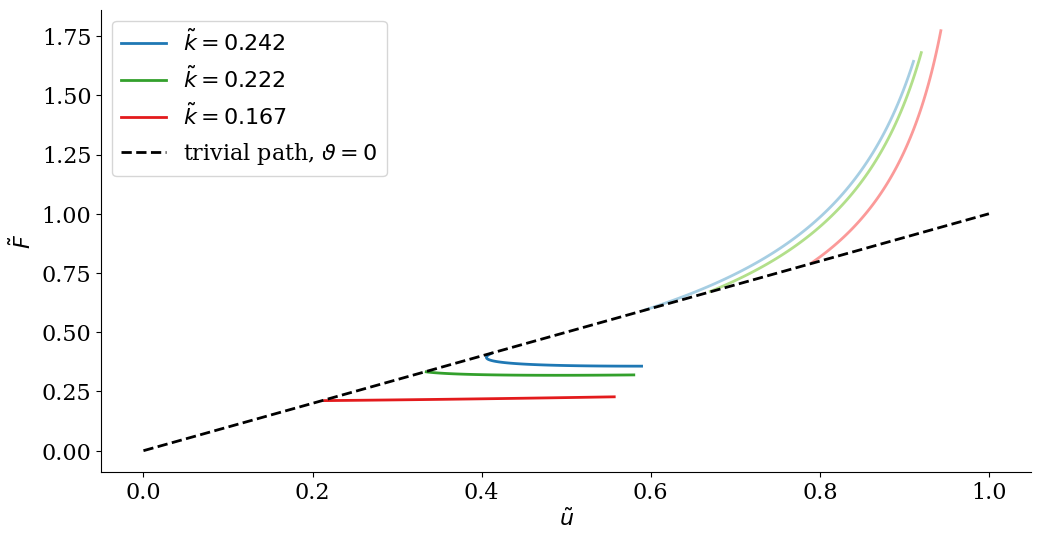

In [22]:
#HIDDEN
angles = np.linspace(0.1,np.pi/3,100)
#sns.set_palette("Paired",n_colors=10)
cmap = plt.colormaps["Paired"]
fig, ax = plt.subplots(figsize=(12,6))
# Define tilde_k values
k_values = [8/33, 8/36, 8/48]

# Plot with paired colors
for idx, k in enumerate(k_values):
    F_vals = F_theta(angles, k)
    color1 = cmap(2 * idx)     # get first color of the pair
    color2 = cmap(2 * idx + 1) # get second color of the pair

    ax.plot(u_num(angles, F_vals[1]), F_vals[1], color=color1)
    ax.plot(u_num(angles, F_vals[0]), F_vals[0], color=color2,
            label=fr'$\tilde{{k}} = {k:.3f}$')
ax.plot([0,1],[0,1],ls='--',color='black',label=r'trivial path, $\vartheta = 0$')
ax.set_xlabel(r'$\tilde{u}$')
ax.set_ylabel(r'$\tilde{F}$')
ax.legend();

We observe three solutions:

* The black dashed line is the solution of vertical compression ($\vartheta = 0$) of a linear spring.
* The dark lines are the first bifurcations from this solution, where the rod leaves the vertical position, $0 < \vartheta < \frac{\pi}{2}$. Towards $\tilde{u} = 1$, i.e. $\vartheta = \frac{\pi}{2}$, we reach force levels determined by the rotational stiffness $k_\text{r}$.
* The bright lines are another set of bifurcation points to a solution where the rod is also rotated, $0 < \vartheta < \frac{\pi}{2}$, but highly compressed. To maintain equilibrium here, the force needs to increase steeply. As $\tilde{u}\rightarrow 1$ ($\vartheta \rightarrow \frac{\pi}{2}$), the length of the axial spring $l$ and with it the lever arm approaches zero; therefore, to still produce the torque required for momentum balance, i.e. $k_\text{r}\frac{\pi}{2}$, the force needs to tend towards infinity. 

We already see from the force-displacement behaviour, which of the solutions is energetically beneficial (the lowest branches).

Thus, let's zoom in on the first bifurcation.

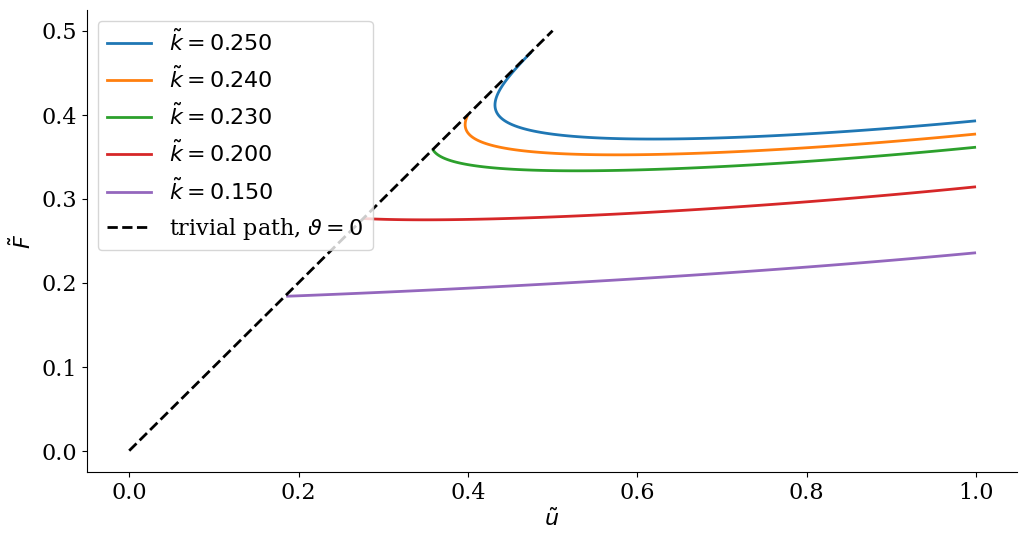

In [23]:
#HIDDEN
angles = np.linspace(0.1,0.999*np.pi/2,100)
#sns.set_palette("Paired",n_colors=10)
fig, ax = plt.subplots(figsize=(12,6))
for i in [1/4,0.24,0.23, 0.2, 0.15]:
    ax.plot(u_num(angles,F_theta(angles,i)[0]),F_theta(angles,i)[0],label=r'$\tilde{k} = %.3f$' %i)
ax.plot([0,0.5],[0,0.5],ls='--',color='black',label=r'trivial path, $\vartheta = 0$')
ax.set_xlabel(r'$\tilde{u}$')
ax.set_ylabel(r'$\tilde{F}$')
ax.legend();

We see a range of fascinating behaviours: For low $\tilde{k}$ we see hardening. An increase of $\tilde{k}$ then produces initial softening followed again by hardening. This softening can even poduce snap-back behaviour close to the upper limit of $\tilde{k} = \frac{1}{4}$. We will show later how these setups correspond to loss of stability under force and/or displacement control.

## Energetic arguments

## Prescribed end displacement

Instead of deriving the equilibrium conditions directly, we can also depart from total potentials in order to more clearly observe the energetic roots of stability and bifurcation.

The total elastic potential $\Pi$ is the sum of the strain energy in the two springs and the work of the external force along its trajectory. We find the elastic energy of the linear spring kinematically by considering $\Delta l \cos\vartheta = u + l_0(\cos \vartheta - 1)$.

\begin{align}
    \Pi &= \frac{k_\text{a} \left[ u + l_0 (\cos\vartheta -1 ) \right]^2}{2\cos^2\vartheta} + \frac{k_\text{r} \vartheta^2}{2} - F_\text{ext} u
    \\
    &= l_0^2 k_\text{a} \left[ \frac{ ( \tilde{u} + \cos\vartheta -1 )^2}{2\cos^2\vartheta} + \frac{\tilde{k} \vartheta^2}{2} - \tilde{F}_\text{ext} \tilde{u}\right] 
\end{align}

Let's take the first variation (note: we don't, yet, prescribe the displacement in order to gain additional information on the associated force)

$$
    \frac{\delta \Pi}{l_0^2 k_\text{a}} =  \left[ \frac{ \tilde{u} + (\cos\vartheta -1 ) }{\cos^2\vartheta} - \tilde{F}_\text{ext} \right] \delta \tilde{u} + \left[ \tilde{k}\vartheta  - (1-\tilde{u}) \frac{\sin\vartheta}{\cos^2\vartheta} \left( 1 - \frac{1-\tilde{u}}{\cos\vartheta} \right) \right] \delta \vartheta
$$

In [24]:
#HIDDEN
F, theta, k, u = sp.symbols('F vartheta k u', positive=True)
a = sp.diff((u+sp.cos(theta)-1)**2/(2*sp.cos(theta)**2),theta)
#display(a, a.simplify(), (a/-(1-u)/sp.sin(theta)).simplify())

By stationarity, we therefore find the external load

$$
    \tilde{F}_\text{ext} = \frac{ \tilde{u} + \cos\vartheta -1 }{\cos^2\vartheta} = \left( 1 - \frac{1 - \tilde{u}}{\cos\vartheta} \right) / \cos \vartheta
$$

as well as the equilibrium conditions

$$
    g_u = 0 = \tilde{k}\vartheta  - (1-\tilde{u}) \frac{\sin\vartheta}{\cos^2\vartheta} \left( 1 - \frac{1-\tilde{u}}{\cos\vartheta} \right)
$$

In [25]:
Eq_u = k*theta - (1-u)*sp.sin(theta)/sp.cos(theta)**2 * (1 - (1-u)/sp.cos(theta))
#display(Eq_u)
res_u = sp.solve(Eq_u,u)
#display(res_u[0],res_u[1])
#display(((res_u[0] - 1 + sp.cos(theta)/2)/sp.cos(theta)*2),((res_u[0] - 1 + sp.cos(theta)/2)/sp.cos(theta)*2).simplify(),((res_u[0] - 1 + sp.cos(theta)/2)/sp.cos(theta)*2).trigsimp())

The equilibrium solution thus is

$$
    \tilde{u} = 1 - \frac{\cos\vartheta}{2}\left[ 1 \mp \frac{\sqrt{2 - 2\cos2\vartheta - 8 \tilde{k}\vartheta\sin2\vartheta}}{2\sin\vartheta} \right]
$$

Now we can plot the equilibrium solutions and recover the previously shown results.

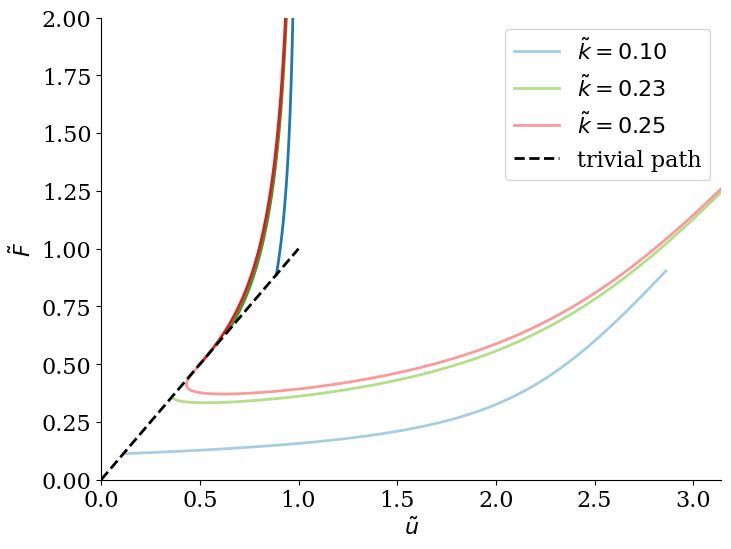

In [37]:
#HIDDEN
F_ext = lambda xU, xT: (xU + np.cos(xT) - 1)/np.cos(xT)**2
u_u_num = lambda xK, xT: [1 - np.cos(xT)/2 * ( 1 + np.sqrt(2 - 2 * np.cos(2*xT) - 8*xK*xT*np.sin(2*xT))/(2*np.sin(xT))),
                          1 - np.cos(xT)/2 * ( 1 - np.sqrt(2 - 2 * np.cos(2*xT) - 8*xK*xT*np.sin(2*xT))/(2*np.sin(xT)))]

fig, ax = plt.subplots()
angles = np.linspace(0.01,np.deg2rad(170),100)
cmap = plt.colormaps["Paired"]
# Define tilde_k values
k_values = [0.1,0.23,0.25]

# Plot with paired colors
for idx, stiff in enumerate(k_values):
    color1 = cmap(2 * idx)     # get first color of the pair
    color2 = cmap(2 * idx + 1) # get second color of the pair
    ax.plot(u_u_num(stiff,angles)[0], F_ext(u_u_num(stiff,angles)[0],angles),label=r'$\tilde{k} = %.2f$' %stiff,color=color1)
    ax.plot(u_u_num(stiff,angles)[1][angles < np.pi/2], F_ext(u_u_num(stiff,angles)[1],angles)[angles < np.pi/2],color=color2)
ax.plot([0,1],[0,1],ls='--',color='black', label=r'trivial path')
ax.set_ylim(0,2)
ax.set_xlim(0,np.deg2rad(180))
ax.set_xlabel(r'$\tilde{u}$')
ax.set_ylabel(r'$\tilde{F}$')
ax.legend();

Taking the variation of $\Pi$ assuming fixed boundary displacement $\tilde{u}$ (i.e. $\delta \tilde{u} = 0$) implies only variations in $\vartheta$. Thus,

\begin{align}
    \frac{\Pi}{l_0^2 k_\text{a}} &= \left[ \frac{ ( \tilde{u} + \cos\vartheta -1 )^2}{2\cos^2\vartheta} + \frac{\tilde{k} \vartheta^2}{2} - \tilde{F}_\text{ext} \tilde{u}\right]
    \\
     \left. \frac{\delta \Pi}{l_0^2 k_\text{a}} \right|_{\tilde{u}} &=  \left[ \tilde{k}\vartheta  - (1-\tilde{u}) \frac{\sin\vartheta}{\cos^2\vartheta} \left( 1 - \frac{1-\tilde{u}}{\cos\vartheta} \right) \right] \delta \vartheta
     \\
     \left. \frac{\delta^2 \Pi}{l_0^2 k_\text{a}} \right|_{\tilde{u}} &=  \left[ \tilde{k}  - (1-\tilde{u}) \left( \frac{(3\tilde{u} - 3 + 2\cos\vartheta)\tan^2\vartheta + (\tilde{u} + \cos\vartheta - 1)}{\cos^2\vartheta}   \right) \right] \delta \vartheta
\end{align}

Looking at values of the second variation along the vertical axis only, we find

$$
    \left. \frac{\delta^2 \Pi}{l_0^2 k_\text{a}} \right|_{\tilde{u}, \vartheta=0} =  \left[ \tilde{k}  - (1-\tilde{u}) \tilde{u} \right] \delta \vartheta
$$

So that the transition between stable and instable regions occurs at

$$
    \tilde{u}_\text{cr} = \frac{1 \pm \sqrt{1 - 4\tilde{k}}}{2}
$$

Let's plot the different solution paths along with the stability indicator $\text{sign}\,\delta^2 \Pi$

In [27]:
Eq = -(1-u)*sp.sin(theta)/sp.cos(theta)**2 * (1 - (1-u)/sp.cos(theta))
res = sp.diff(Eq,theta)
#display(Eq,res,res.simplify(),res.trigsimp())

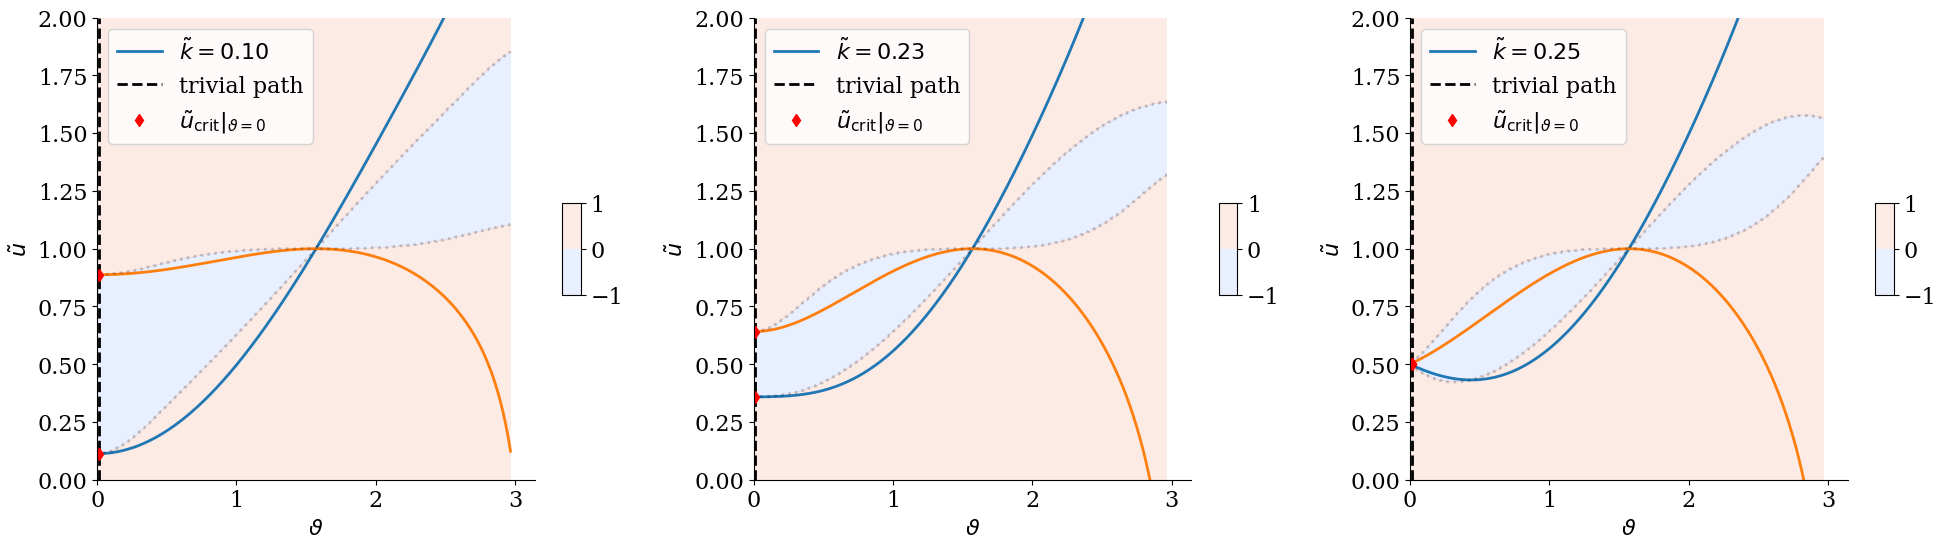

In [28]:
d2Pi = lambda xK, xU, xT: xK - (1-xU)*( ( (3*xU-3+2*np.cos(xT))*np.tan(xT)**2 + (xU + np.cos(xT) - 1)  )/np.cos(xT)**2 )
u_vert = lambda xK: [(1+np.sqrt(1-4*xK))/2, (1-np.sqrt(1-4*xK))/2]

fig, ax = plt.subplots(figsize=(24,6),ncols=3)
angles = np.linspace(0.01,np.deg2rad(170),1000)
y = np.linspace(0, 2, 1000)
X,Y = np.meshgrid(angles,y)
for i, stiff in enumerate([0.1,0.23,0.25]):
    ax[i].plot(angles,u_u_num(stiff,angles)[0],label=r'$\tilde{k} = %.2f$' %stiff)
    ax[i].plot(angles,u_u_num(stiff,angles)[1])
    cset = ax[i].contourf(X,Y, np.sign(d2Pi(stiff,Y,X)),cmap=cm.coolwarm, levels=[-1,0,1],alpha=0.2)
    ax[i].contour(X,Y, np.sign(d2Pi(stiff,Y,X)), levels=[0],alpha=0.2,colors='black',linestyles=':')
    ax[i].axvline(0.01,ls='--',color='black', label=r'trivial path')
    ax[i].plot([0.01,0.01],u_vert(stiff),ls='',marker='d',color='red',label=r'$\tilde{u}_\mathrm{crit} |_{\vartheta = 0}$')
    ax[i].set_ylim(0,2)
    ax[i].set_xlim(0,np.deg2rad(180))
    ax[i].set_xlabel(r'$\vartheta$')
    ax[i].set_ylabel(r'$\tilde{u}$')
    ax[i].legend()
    plt.colorbar(cset,shrink=0.2, aspect=5, ax=ax[i]);

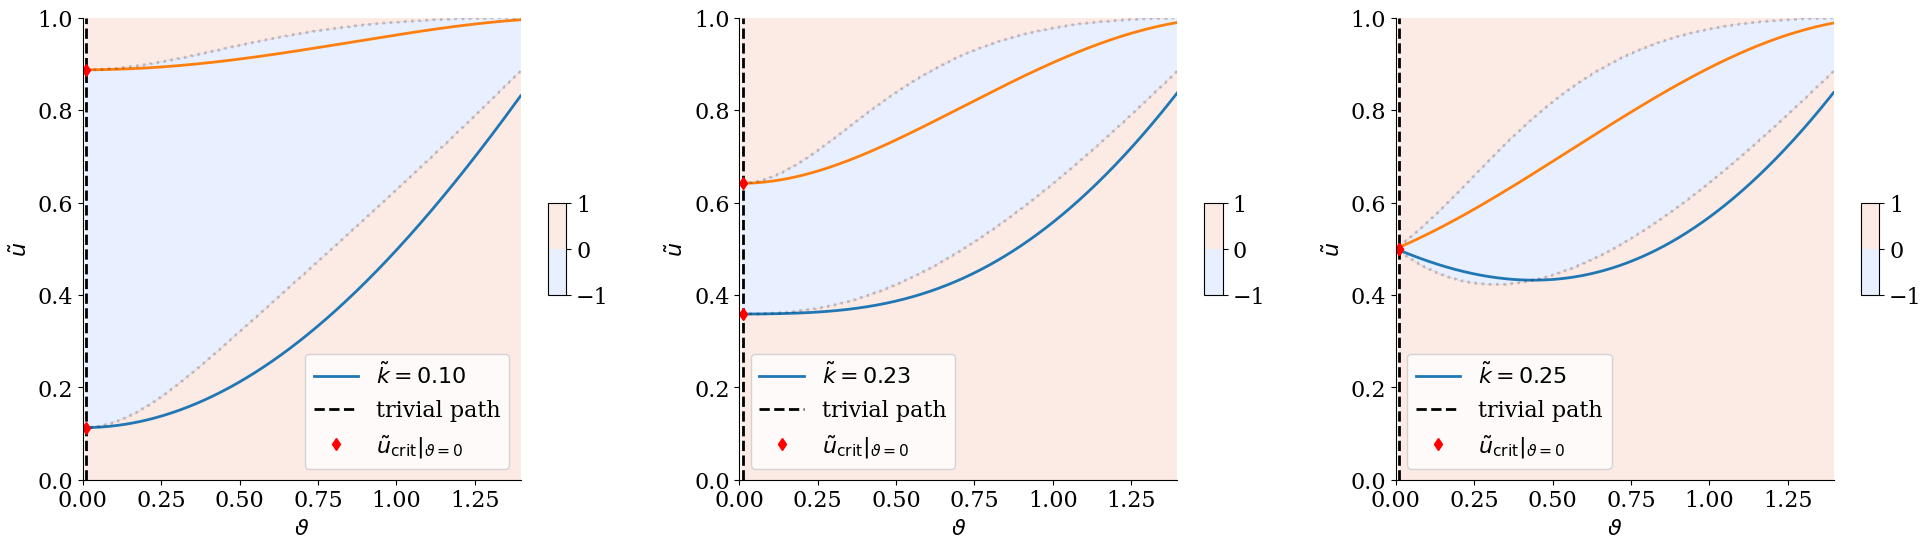

In [29]:
#HIDDEN
d2Pi = lambda xK, xU, xT: xK - (1-xU)*( ( (3*xU-3+2*np.cos(xT))*np.tan(xT)**2 + (xU + np.cos(xT) - 1)  )/np.cos(xT)**2 )
u_vert = lambda xK: [(1+np.sqrt(1-4*xK))/2, (1-np.sqrt(1-4*xK))/2]

fig, ax = plt.subplots(figsize=(24,6),ncols=3)
angles = np.linspace(0.01,np.deg2rad(80),1000)
y = np.linspace(0, 1, 1000)
X,Y = np.meshgrid(angles,y)
for i, stiff in enumerate([0.1,0.23,0.25]):
    ax[i].plot(angles,u_u_num(stiff,angles)[0],label=r'$\tilde{k} = %.2f$' %stiff)
    ax[i].plot(angles,u_u_num(stiff,angles)[1])
    cset = ax[i].contourf(X,Y, np.sign(d2Pi(stiff,Y,X)),cmap=cm.coolwarm, levels=[-1,0,1],alpha=0.2)
    ax[i].contour(X,Y, np.sign(d2Pi(stiff,Y,X)), levels=[0],alpha=0.2,colors='black',linestyles=':')
    ax[i].axvline(0.01,ls='--',color='black', label=r'trivial path')
    ax[i].plot([0.01,0.01],u_vert(stiff),ls='',marker='d',color='red',label=r'$\tilde{u}_\mathrm{crit} |_{\vartheta = 0}$')
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(0,np.deg2rad(80))
    ax[i].set_xlabel(r'$\vartheta$')
    ax[i].set_ylabel(r'$\tilde{u}$')
    ax[i].legend()
    plt.colorbar(cset,shrink=0.2, aspect=5, ax=ax[i]);

We clearly see the bifurcation points coindicing with a stability loss. We also see, how the vertical solution is stable both before the first and after the second bifurcation.  A softening response (middle picture) can be done in a stable fashion under displacement control. Finally, we observe that the first bifurcated branch undergoes an unstable transition under displacement control when the equilibrium path exhibits snap-back (right picture). One can imagine holding $\tilde{u}$ fixed in the straight configuration and perturbing $\vartheta$, leading to a sudden jump to the new non-straight equilibrium configuration. At the bifurcation point, only a slight perturbation is necessary, while slightly below it, a deliberate finite perturbation can also bring the system to a new equilibrium position (snap). The equilibrium path acts as a demarcation line: if our perturbation of $\vartheta$ is in the region left to it, the system gets pulled back to the vertical equilibrium (trivial branch). If it touches/crosses the equilibrium line, it snaps to the right solution (stable point on bifurcated branch); see next picture.

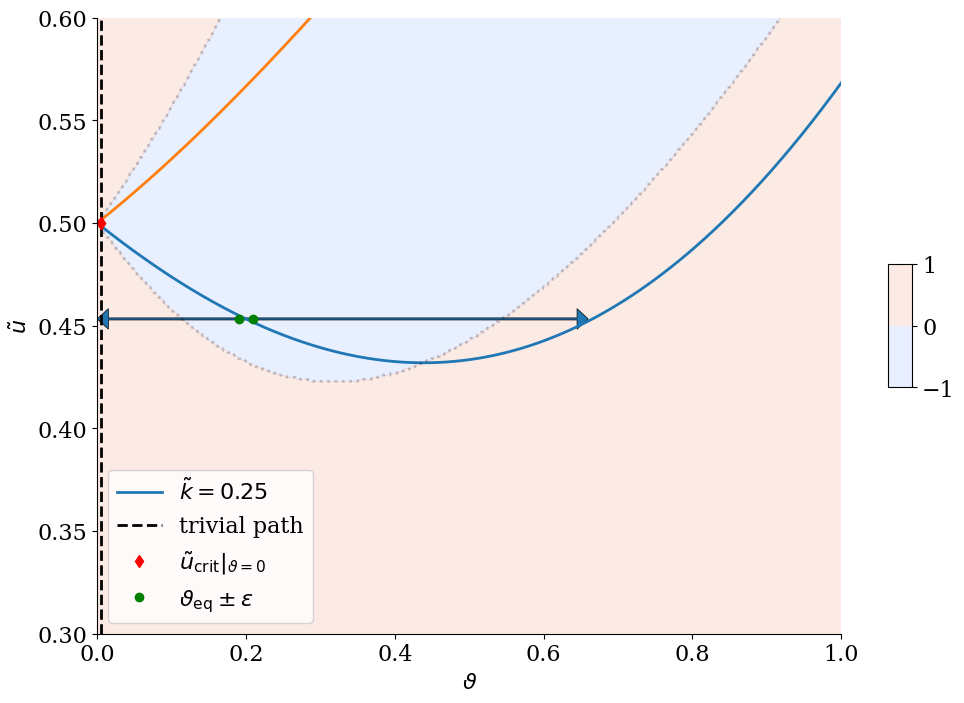

In [30]:
#HIDDEN
d2Pi = lambda xK, xU, xT: xK - (1-xU)*( ( (3*xU-3+2*np.cos(xT))*np.tan(xT)**2 + (xU + np.cos(xT) - 1)  )/np.cos(xT)**2 )
u_vert = lambda xK: [(1+np.sqrt(1-4*xK))/2, (1-np.sqrt(1-4*xK))/2]

fig, ax = plt.subplots(figsize=(12,8))
angles = np.linspace(0.001,np.deg2rad(80),1000)
y = np.linspace(0, 1, 1000)
X,Y = np.meshgrid(angles,y)
stiff = 0.25
ax.plot(angles,u_u_num(stiff,angles)[0],label=r'$\tilde{k} = %.2f$' %stiff)
ax.plot(angles,u_u_num(stiff,angles)[1])
cset = ax.contourf(X,Y, np.sign(d2Pi(stiff,Y,X)),cmap=cm.coolwarm, levels=[-1,0,1],alpha=0.2)
ax.contour(X,Y, np.sign(d2Pi(stiff,Y,X)), levels=[0],alpha=0.2,colors='black',linestyles=':')
ax.axvline(0.005,ls='--',color='black', label=r'trivial path')
ax.plot([0.005,0.005],u_vert(stiff),ls='',marker='d',color='red',label=r'$\tilde{u}_\mathrm{crit} |_{\vartheta = 0}$')
ax.plot(0.2-0.01,u_u_num(stiff,0.2)[0],ls='',marker='o',color='green',label=r'$\vartheta_\mathrm{eq}\pm\varepsilon$')
ax.plot(0.2+0.01,u_u_num(stiff,0.2)[0],ls='',marker='o',color='green')
ax.arrow(0.2-0.01,u_u_num(stiff,0.2)[0],-0.2+0.01,0,length_includes_head=True,lw=0.5,head_width=0.01)
ax.arrow(0.2-0.01,u_u_num(stiff,0.2)[0],0.47,0,length_includes_head=True,lw=0.5,head_width=0.01) #approximate
ax.set_ylim(0.3,0.6)
ax.set_xlim(0,1)
ax.set_xlabel(r'$\vartheta$')
ax.set_ylabel(r'$\tilde{u}$')
ax.legend()
plt.colorbar(cset,shrink=0.2, aspect=5, ax=ax);

### Prescribed load

Substitution of the Force solution into the equilibrium equation $\tilde{g}_u=0$ yields

$$
    g_F = 0 = \tilde{k}\vartheta + \tilde{F}_\text{ext}^2 \sin\vartheta\cos\vartheta - \tilde{F}_\text{ext}\sin\vartheta
$$

as an equilibrium condition.

In [31]:
Eq = k*theta -(1-u)*sp.sin(theta)/sp.cos(theta)**2 * (1 - (1-u)/sp.cos(theta))
#Eq.subs(u,F*sp.cos(theta)**2 + 1 - sp.cos(theta)).simplify()

A variation of $g_F$ for fixed external loads yields

$$
 \delta g_F |_{\tilde{F}_\text{ext}} = \left[\tilde{k} + \tilde{F}_\text{ext}^2 (\cos^2\vartheta - \sin^2\vartheta) - \tilde{F}_\text{ext}\cos\vartheta \right] \delta\vartheta
$$

For the trivial path we find

$$
    \delta g_F |_{\tilde{F}_\text{ext},\vartheta=0} =  \tilde{k} + \tilde{F}_\text{ext}^2 - \tilde{F}_\text{ext}
$$

Thus, the stability limits along the trivial path are

$$
    \tilde{F}_\text{cr} = \frac{1 \pm \sqrt{1 - 4\tilde{k}}}{2}
$$

Let's plot the solutions on the energy potential landscape.

In [32]:
Pi_F_num = lambda xF, xTheta, xK: xK*xTheta**2/2 - xF**2*np.cos(xTheta)**2/2 + xF*(np.cos(xTheta)-1)

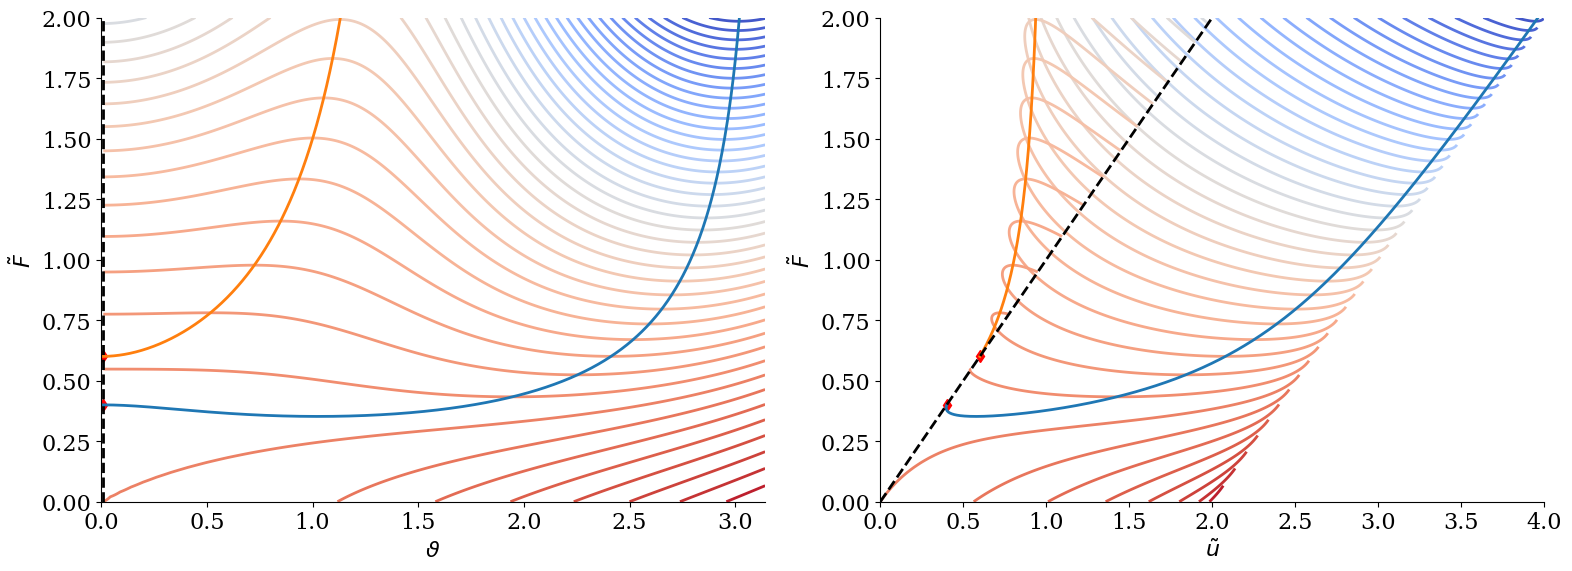

In [33]:
F_cr = lambda xK: [(1 - np.sqrt(1 - 4*xK))/2, (1 + np.sqrt(1 - 4*xK))/2]

stiff = 0.24
fig, ax = plt.subplots(ncols=2,figsize=(16,6))
x = np.linspace(0, 2, 100)
y = np.linspace(0.01, np.pi, 1000)
X,Y = np.meshgrid(x,y)
ax[0].set_xlabel(r'$\vartheta$')
ax[0].set_ylabel(r'$\tilde{F}$')
cset = ax[0].contour(Y,X, Pi_F_num(X,Y,stiff),cmap=cm.coolwarm, levels=40)
ax[0].plot([0.01,0.01],F_cr(stiff),ls='',marker='d',color='red')
ax[0].plot([0.01,0.01],[0,2],color='black',ls='--',label=r'trivial path')
ax[0].plot(y,F_theta(y,stiff)[0])
ax[0].plot(y[y<np.pi/2],F_theta(y[y<np.pi/2],stiff)[1])
ax[0].set_ylim(0,2)
ax[0].set_xlim(0,np.pi)

ax[1].set_xlabel(r'$\tilde{u}$')
ax[1].set_ylabel(r'$\tilde{F}$')
cset = ax[1].contour(u_num(Y,X),X, Pi_F_num(X,Y,stiff),cmap=cm.coolwarm, levels=50)
ax[1].plot(F_cr(stiff),F_cr(stiff),ls='',marker='d',color='red')
ax[1].plot(u_num(y,F_theta(y,stiff)[0]),F_theta(y,stiff)[0])
ax[1].plot(u_num(y[y<=np.pi/2],F_theta(y[y<np.pi/2],stiff)[1]),F_theta(y[y<np.pi/2],stiff)[1])
ax[1].plot([0,2],[0,2],color='black',ls='--',label=r'trivial path')
ax[1].set_ylim(0,2)
ax[1].set_xlim(0,4)
fig.tight_layout();

The connection to the extremes (stationary points) of the energy landscape becomes apparent.

Now let's re-plot the solution for force control with the indication of the stability regions using the stability indicator $\text{sign}\,\delta g_F$.

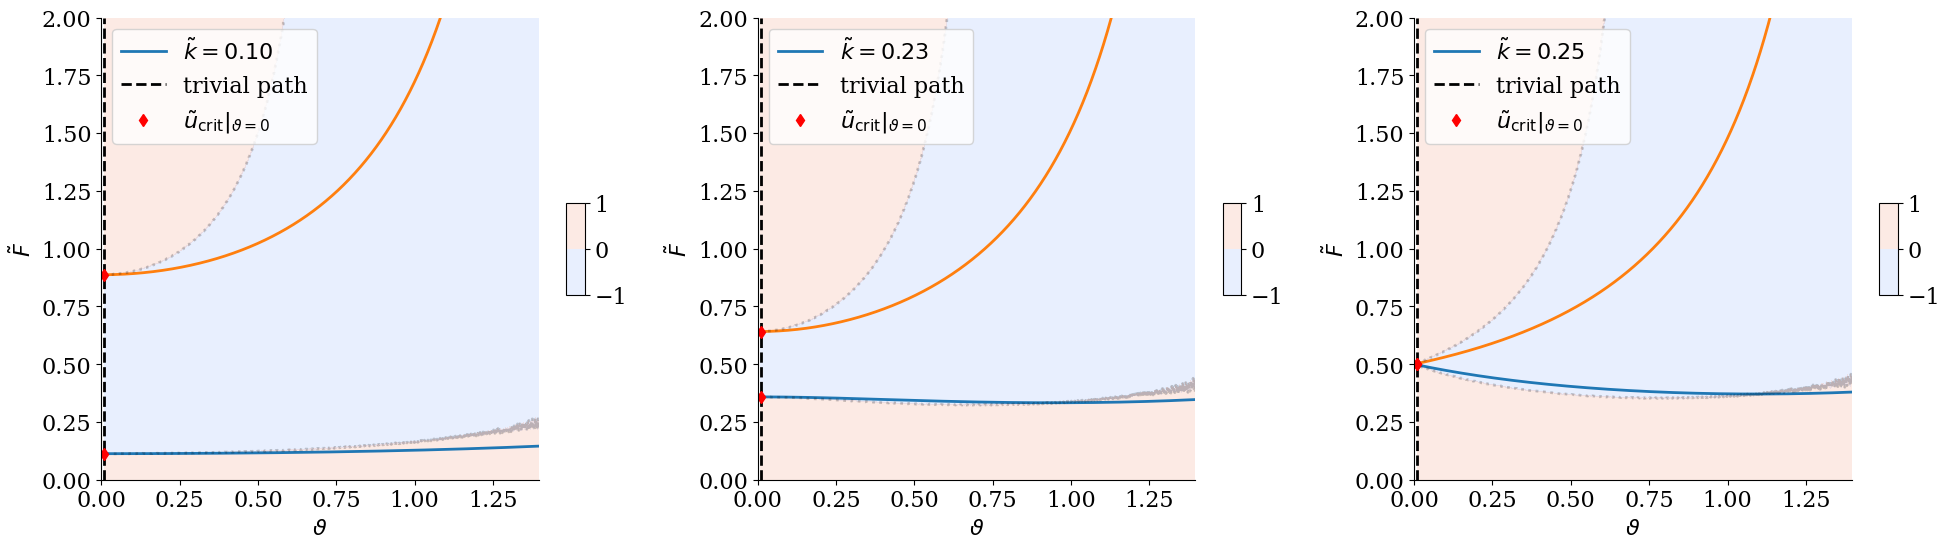

In [34]:
d2Pi = lambda xK, xF, xT: xK - xF *np.cos(xT)  + xF**2 * (np.cos(xT)**2 - np.sin(xT)**2)
F_ext = lambda xU, xT: (xU + np.cos(xT) - 1)/np.cos(xT)**2

fig, ax = plt.subplots(figsize=(24,6),ncols=3)
angles = np.linspace(0.01,np.deg2rad(80),1000)
y = np.linspace(0, 2, 1000)
X,Y = np.meshgrid(angles,y)
for i, stiff in enumerate([0.1,0.23,0.25]):
    ax[i].plot(angles,F_ext(u_u_num(stiff,angles)[0],angles),label=r'$\tilde{k} = %.2f$' %stiff)
    ax[i].plot(angles[angles < np.pi/2],F_ext(u_u_num(stiff,angles)[1],angles)[angles < np.pi/2])
    cset = ax[i].contourf(X,F_ext(Y,X), np.sign(d2Pi(stiff,F_ext(Y,X),X)),cmap=cm.coolwarm, levels=[-1,0,1],alpha=0.2)
    ax[i].contour(X,F_ext(Y,X), np.sign(d2Pi(stiff,F_ext(Y,X),X)), levels=[0],alpha=0.2,colors='black',linestyles=':')
    ax[i].axvline(0.01,ls='--',color='black', label=r'trivial path')
    ax[i].plot([0.01,0.01],u_vert(stiff),ls='',marker='d',color='red',label=r'$\tilde{u}_\mathrm{crit} |_{\vartheta = 0}$')
    ax[i].set_ylim(0,2)
    ax[i].set_xlim(0,np.deg2rad(80))
    ax[i].set_xlabel(r'$\vartheta$')
    ax[i].set_ylabel(r'$\tilde{F}$')
    ax[i].legend()
    plt.colorbar(cset,shrink=0.2, aspect=5, ax=ax[i]);

we can see now how, in addition to snap-backs, softening responses (middle picture) become unstable under force control.